In [1]:
ls

drive/  sample_data/


In [2]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [7]:
pwd

'/content/drive/MyDrive/CNN'

In [8]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
replace TRAIN_SET/APPLES/0_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!unzip /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip

unzip:  cannot find or open /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip, /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip.zip or /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip.ZIP.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/TRAIN_SET",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 2626 images belonging to 5 classes.


In [13]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/Dataset",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 1055 images belonging to 1 classes.


In [14]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [21]:
model.add(Dense(5,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

In [23]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [24]:
model.add(Dense(4,activation='softmax'))

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [26]:
len(x_train)

110

In [28]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10


InvalidArgumentError: ignored

In [29]:
model.save('train.h5')

In [30]:
model.save('dataset.h5')

In [31]:
model.save('fruits.h5')

In [32]:
model.save('nutrition.h5')

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model=load_model('train.h5')

In [35]:
model=load_model('dataset.h5')

In [36]:
model=load_model('fruits.h5')

In [37]:
model=load_model('nutrition.h5')

In [38]:
!tar zcvf nutrition-classification-model.tgz nutrition.h5

nutrition.h5


In [39]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.4 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 132 kB 53.9 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 9.9 MB 45.9 MB/s 
     |████████████████████████████████| 140 kB 59.2 MB/s 
     |████████████████████████████████| 956 kB 49.8 MB/s 
     |████████████████████████████████| 135 kB 66.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=496b4d27c1f9ad5ec8927b4d210731e60c4266dff115986858ed2532660176a2
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=5db82752dd2

In [40]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 51 kB 459 kB/s 
     |████████████████████████████████| 824 kB 46.1 MB/s 
     |████████████████████████████████| 133 kB 64.9 MB/s 
     |████████████████████████████████| 547 kB 54.1 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=62f7be8c1fa937e01c4d0c8d936d2446337981cb63854c8fb06df01b1cb3cce2
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=53ba3df75c8b087814f2bf566105e9ef308000f3ef9e2724a2b69e53b0804131
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [41]:
from ibm_watson_machine_learning import APIClient

In [42]:
wml_credentials = {
    "url" : "https://eu-de.ml.cloud.ibm.com",
    "apikey" : "V8hik2Q5eS1s_K8jZ72O5X-READkcQBr_qVGtJ37by5j"
    
}

In [43]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [44]:
client

In [45]:
client.spaces.list(50)

------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
34050180-23c9-44f5-8800-32db49349e5d  nutrition  2022-11-11T07:33:27.438Z
------------------------------------  ---------  ------------------------


In [46]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-de:a/eb0a09c9a4b84a999a2f55a11273104a:7ddc9f3b-3f88-47f7-82c4-59fe493c461f::',
      'guid': '7ddc9f3b-3f88-47f7-82c4-59fe493c461f',
      'name': 'Watson Machine Learning-os',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'nutrition',
    'scope': {'bss_account_id': 'eb0a09c9a4b84a999a2f55a11273104a'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'ef20fd22-5bbb-4e1f-840c-128c3bf226a3',
      'bucket_region': 'eu-de-standard',
      'credentials': {'admin': {'access_key_id': '2a55175802a843b58a5529fa9bf1fd8a',
        'api_key': 'uHZ8wcSXEZjqA8Zi_OcEBcAPiL-3RkouH-EJg5z3V6Ou',
        'secret_access_key': 'f637c4cfc6d8d2ab36bf9a7524bc072a17fff7fd8b416452',
        'service_id': 'ServiceId-8f67a74b-c424-47f3-a2bd-75966467fee3'},
       'editor': {'access_key_id': '6b54460b839b47d8bdecefd6d1b7685e',
        'api_key

In [47]:
space_uid="34050180-23c9-44f5-8800-32db49349e5d"

In [48]:
client.set.default_space(space_uid)

'SUCCESS'

In [49]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [50]:
# setting up the tensorflow python
software_space_uid= client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [51]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [52]:
model_details = client.repository.store_model(model = "nutrition-classification-model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME : "CNN Model",
    client.repository.ModelMetaNames.TYPE : "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : "acd9c798-6974-5d2f-a657-ce06e986df4d"
    })

In [53]:
model_id= client.repository.get_model_id(model_details)

In [54]:
model_id

'd540660e-be15-449e-95f5-bc826206e2a4'

In [55]:
client.repository.download(model_id,'nutrition.tar.biz')

Successfully saved model content to file: 'nutrition.tar.biz'


'/content/drive/MyDrive/CNN/nutrition.tar.biz'

In [56]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

In [57]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


In [58]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')


In [59]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [60]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launches():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

In [61]:
pred = model.predict

In [62]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 145s 3s/step


In [63]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [64]:
result=str(index[classes_x[0]])

In [66]:
x=result
print(x)
result=nutrition(result)
print(result)

APPLE


NameError: ignored

In [67]:
import http.client

conn = http.client.HTTPSConnection("calorieninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
    'X-RapidAPI-Host': "calorieninjas.p.rapidapi.com"
    }

conn.request("GET", "/v1/nutrition?query=Apples", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [68]:
import requests

url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

querystring = {"query":"apples"}

headers = {
	"X-RapidAPI-Key": "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
	"X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [ ]:
if __name__ == "__main__":
   # running the app
    app.run(debug=False)

In [70]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [71]:
model=load_model('fruits.h5')

In [72]:
model=load_model('train.h5')

In [73]:
model=load_model('dataset.h5')

In [74]:
model=load_model('nutrition.h5')

In [75]:
img=image.load_img(r"/content/drive/MyDrive/CNN/Dataset/TEST_SET/PINEAPPLE/125_100.jpg")

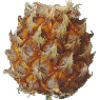

In [76]:
img

In [77]:
img=image.load_img(r"/content/drive/MyDrive/CNN/Dataset/TEST_SET/PINEAPPLE/125_100.jpg",target_size=(64,64))

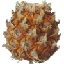

In [78]:
img

In [79]:
x=image.img_to_array(img)

In [80]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [81]:
x=np.expand_dims(x,axis=0)

In [82]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [83]:
pred = model.predict

In [84]:
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f9a79783d10>>

In [85]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 4s 83ms/step


In [86]:
predict_x

array([[0.25355312, 0.25004715, 0.24461013, 0.25178954],
       [0.25320014, 0.25005263, 0.24501596, 0.25173122],
       [0.25324506, 0.24938427, 0.2450957 , 0.25227484],
       ...,
       [0.25351962, 0.24994928, 0.24468185, 0.25184932],
       [0.25362322, 0.24928829, 0.24507488, 0.25201365],
       [0.25395182, 0.24983345, 0.24465345, 0.25156125]], dtype=float32)

In [87]:
classes_x

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
x_test.class_indices

{'TEST_SET': 0}

In [89]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [90]:
result=str(index[classes_x[0]])

In [91]:
result

'APPLE'

In [92]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

In [93]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


In [94]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [95]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [ ]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launch():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

In [96]:
pred = model.predict

In [97]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 4s 81ms/step


In [98]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [99]:
result=str(index[classes_x[0]])

In [100]:
x=result

In [101]:
print(x)

APPLE


In [102]:
print(result)

APPLE


In [103]:
import http.client

conn = http.client.HTTPSConnection("calorieninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
    'X-RapidAPI-Host': "calorieninjas.p.rapidapi.com"
    }

conn.request("GET", "/v1/nutrition?query=Apples", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [104]:
import requests

url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

querystring = {"query":"apples"}

headers = {
	"X-RapidAPI-Key": "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
	"X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [ ]:
if __name__ == "__main__":
   # running the app
    app.run(debug=False)